In [89]:
# ==============================================
# Autoencoder-based Anomaly Detection (ECG Data)
# ==============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# (a) Load the dataset
df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\LP4\ECGdataset(Ass4)-20251107T143053Z-1-001\ECGdataset(Ass4)\ecg_autoencoder_dataset.csv", header=None)
print(df.head(10))
print("Dataset shape:", df.shape)

        0         1         2         3         4         5         6    \
0 -0.112522 -2.827204 -3.773897 -4.349751 -4.376041 -3.474986 -2.181408   
1 -1.100878 -3.996840 -4.285843 -4.506579 -4.022377 -3.234368 -1.566126   
2 -0.567088 -2.593450 -3.874230 -4.584095 -4.187449 -3.151462 -1.742940   
3  0.490473 -1.914407 -3.616364 -4.318823 -4.268016 -3.881110 -2.993280   
4  0.800232 -0.874252 -2.384761 -3.973292 -4.338224 -3.802422 -2.534510   
5 -1.507674 -3.574550 -4.478011 -4.408275 -3.321242 -2.105171 -1.481048   
6 -0.297161 -2.766635 -4.102185 -4.589669 -4.219357 -3.650443 -2.300518   
7  0.446769 -1.507397 -3.187468 -4.507462 -4.604201 -3.636115 -2.311604   
8  0.087631 -1.753490 -3.304473 -4.704657 -4.686415 -3.611817 -2.267268   
9 -0.832281 -1.700368 -2.257301 -2.853671 -2.853301 -2.701487 -2.285726   

        7         8         9    ...       131       132       133       134  \
0 -1.818286 -1.250522 -0.477492  ...  0.792168  0.933541  0.796958  0.578621   
1 -0.992258 -0

In [90]:
# (b) Separate features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

print(f"Normal Samples: {np.sum(y == 1)}")
print(f"Anomalies: {np.sum(y == 0)}")

Normal Samples: 2919
Anomalies: 2079


In [91]:
# (c) Train-test split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size = 0.2, random_state=42)
# Use only normal samples for training
X_train_normal = X_train_full[y_train_full == 1]

In [92]:
# (d) Normalize the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_normal)
X_test_scaled = scaler.fit_transform(X_test_full)
X_scaled = scaler.transform(X)

In [93]:
# (e) Define Autoencoder Architecture
input_dim = X_train_scaled.shape[1]
latent_dim = 8
intermediate_dim = 16

In [94]:
# Encoder
input_layer = Input(shape = (input_dim,), name = "Input_Layer")
encoded = Dense(64, activation="relu", name = "Encoded_L1")(input_layer)
encoded = Dense(32, activation="relu", name = "Encoded_L2")(encoded)
encoded = Dense(16, activation="relu", name = "Encoded_L3")(encoded)
latent = Dense(latent_dim, activation="relu", name = "Latent_Representation")(encoded)

# Decoder
decoded = Dense(16, activation="relu", name = "Decoded_L1")(latent)
decoded = Dense(32, activation="relu", name = "Decoded_L2")(decoded)
decoded = Dense(64, activation="relu", name = "Decoded_L3")(decoded)
output_layer = Dense(input_dim, activation="linear", name = "Output_Layer")(decoded)

In [95]:
autoencoder = Model(inputs = input_layer, outputs = output_layer, name = "ECG_Autoencoder")
adam = Adam(0.001)
autoencoder.compile(loss = "mse", optimizer=adam, metrics=["mae"])
H = autoencoder.fit(X_train_scaled, X_train_scaled, validation_split=0.2, epochs=50, batch_size=512, verbose = 0)
autoencoder.summary()

Model: "ECG_Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 140)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoded_L1 (Dense)              │ (None, 64)             │         9,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoded_L2 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoded_L3 (Dense)              │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent_Representation (Dense)   │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoded_L1 (Dense)              │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoded_L2 (Dense)              │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoded_L3 (Dense)              │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 140)            │         9,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,006 (277.37 KB)

 Trainable params: 23,668 (92.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 47,338 (184.92 KB)

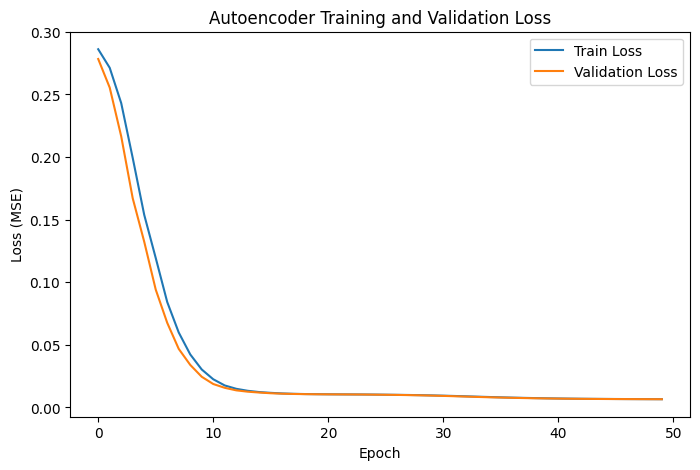

In [96]:
# (i) Visualize training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(H.history['loss'], label='Train Loss')
plt.plot(H.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Autoencoder Training and Validation Loss")
plt.legend()
plt.show()

In [97]:
restructions = autoencoder.predict(X_test_scaled)
mse = np.mean(np.square(X_test_scaled - restructions), axis = 1)

threshold = np.mean(mse) + np.std(mse)
print(f"Anomoly Detection Threshold: {threshold:.5f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Anomoly Detection Threshold: 0.04040


In [98]:
predicted_anomalies = (mse > threshold).astype(int)
predicted_anomalies = np.where(predicted_anomalies == 1, 0, 1)
# print(predicted_anomalies)

In [99]:
print(f"Count of Anomalies in Test data: {np.sum(predicted_anomalies == 0)}")
accuracy = accuracy_score(y_test_full, predicted_anomalies)
print(f"Accuracy: {accuracy:.4f}")

Count of Anomalies in Test data: 153
Accuracy: 0.7140


In [100]:
print(classification_report(y_test_full, predicted_anomalies))

              precision    recall  f1-score   support

           0       0.90      0.34      0.49       409
           1       0.68      0.97      0.80       591

    accuracy                           0.71      1000
   macro avg       0.79      0.66      0.65      1000
weighted avg       0.77      0.71      0.67      1000



  1/157 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step


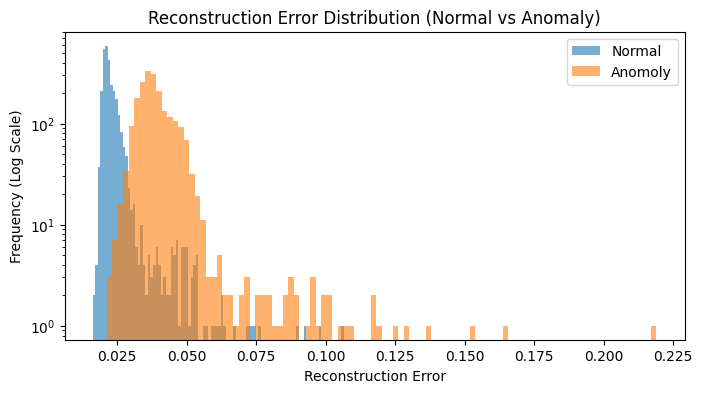

In [101]:
reconstruction_full = autoencoder.predict(X_scaled)
mse_full = np.mean(np.square(X_scaled - reconstruction_full), axis = 1)
error_df = pd.DataFrame({"Reconstruction_full":mse_full, "True_Class" : y})

plt.figure(figsize=(8, 4))
plt.hist(error_df[error_df["True_Class"] == 1]["Reconstruction_full"], bins = 100, alpha = 0.6, label="Normal")
plt.hist(error_df[error_df["True_Class"] == 0]["Reconstruction_full"], bins = 100, alpha = 0.6, label="Anomoly")
plt.yscale("log")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency (Log Scale)")
plt.title("Reconstruction Error Distribution (Normal vs Anomaly)")
plt.legend()
plt.show()